# Workshop 1
# Exploratory analysis of a property price dataset

## Objectives:
1. Perform dataset cleanup: devise strategies to deal with missing data on certain variables.
2. Carry out a descriptive analysis of the main variables.
3. Create new columns from the given characteristics that may have predictive value.

## Download the worked dataset:
https://drive.google.com/file/d/0BzVrTKc02N8qNUdDSExBQlFTNlU/view

## Requirements and material to deliver
1. A jupyter notebook/lab that meets the project requirements, where the cleaning and analysis of the data to be delivered is performed and displayed. The notebook must be properly commented, and must be able to run without errors from start to finish.
2. A presentation of no more than 10 minutes of the work done, consisting of a presentation accompanied by some non-technical slides (PPT or Google Slides).

This presentation must consist of:
- An introduction (statement of the problem, the question, the description of the dataset, etc.).
- A development of the analyzes carried out (descriptive analysis, preliminary correlation analysis, preliminary visualizations).
- An exposition of the main results and conclusions.

## General dataset information
The dataset contains information about all the georeferenced properties in the company database. The information of each property that it includes is the following:
- ID registration
- Type of property (house, apartment, ph)
- Ad operation (sell, rent)
- Name of the place
- Name of the place + name of their 'parents'
- Geonames ID of the place (if available)
- Latitude Longitude
- Original price of the ad
- Original currency of the notice (ARS, USD)
- Ad price in local currency (ARS)
- Approximate price in USD
- Area in m2
- Covered area in m2
- Price in USD/m2
- Price per m2
- Floor number, if applicable
- Environments
- URL in Properati
- Description
- Title
- URL of a thumbnail of the first photo

## Libraries to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Initial dataset exploration

#### Upload of the original file supplied.

In [2]:
data_original = pd.read_csv('properatti.csv')

#### A copy of the dataset is created so as not to alter the original.

In [3]:
data = data_original.copy()
data.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


#### Dataset statistical information.

In [4]:
data.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


#### Amount of non-null data in the dataset.

In [5]:
data.notna().sum()

Unnamed: 0                    121220
operation                     121220
property_type                 121220
place_name                    121197
place_with_parent_names       121220
country_name                  121220
state_name                    121220
geonames_id                   102503
lat-lon                        69670
lat                            69670
lon                            69670
price                         100810
currency                      100809
price_aprox_local_currency    100810
price_aprox_usd               100810
surface_total_in_m2            81892
surface_covered_in_m2         101313
price_usd_per_m2               68617
price_per_m2                   87658
floor                           7899
rooms                          47390
expenses                       14262
properati_url                 121220
description                   121218
title                         121220
image_thumbnail               118108
dtype: int64

#### Amount of null data from the dataset.

In [6]:
data.isna().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

#### Number of rows and columns contained in the dataset.

In [7]:
data.shape

(121220, 26)

#### A bar chart is created showing the relationship between the amount of null and non-null data for some variables in the dataset.

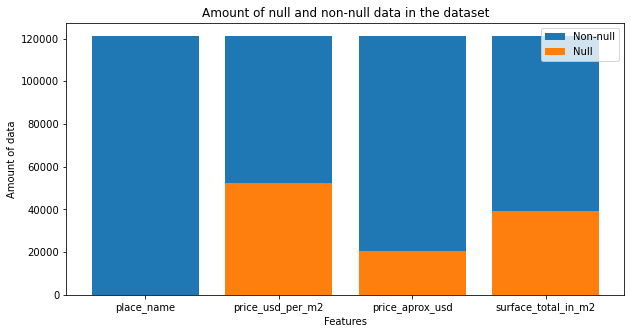

In [8]:
columns = ['place_name','price_usd_per_m2','price_aprox_usd','surface_total_in_m2']
null = data[columns].isna().sum().values
not_null = data[columns].notna().sum().values

plt.figure(figsize = (10,5), edgecolor = 'blue')
plt.bar(columns, not_null, label = 'Non-null', bottom = null)
plt.bar(columns, null, label = 'Null')

plt.xticks(columns)
plt.ylabel("Amount of data")
plt.xlabel("Features")
plt.title('Amount of null and non-null data in the dataset')
plt.legend(loc = 'best')
 
plt.show()

## Dataset cleanup

#### Name of the dataset columns.

In [9]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

#### The 'Unnamed: 0' column is removed because it contains the same indices from the dataset.

In [10]:
print(data['Unnamed: 0'].unique())
print(len(data['Unnamed: 0'].unique()))
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

[     0      1      2 ... 121217 121218 121219]
121220


#### The 'operation' column is removed because it only contains a single repeated data ('sell').

In [11]:
print(data.operation.value_counts())
data.drop(['operation'], axis = 1, inplace = True)

sell    121220
Name: operation, dtype: int64


#### The 'country_name' column is removed because it only contains a single repeated data ('Argentina').

In [12]:
print(data.country_name.value_counts())
data.drop(['country_name'], axis = 1, inplace = True)

Argentina    121220
Name: country_name, dtype: int64


#### Evaluates whether the indices of the 'lat-lon', 'lat' and 'lon' columns match where there are non-null values.
The 'lat-lon' column is removed if the result is 'True'.

In [13]:
index_lat_lon = (data.loc[data['lat-lon'].notna() == True,'lat-lon']).index
index_lat = (data.loc[data['lat'].notna() == True,'lat']).index
index_lon = (data.loc[data['lon'].notna() == True,'lon']).index
print(index_lat_lon.equals(index_lat) & index_lat_lon.equals(index_lon) & index_lat.equals(index_lon))

data.drop(['lat-lon'], axis = 1, inplace = True)

True


#### The 'properati_url' and 'image_thumbnail' columns are removed because they do not provide relevant information for the analysis.

In [14]:
data.drop(['properati_url','image_thumbnail'], axis = 1, inplace = True)

## Missing data processing

#### Amount of null data after performing a first cleanup on the dataset.

In [15]:
data.isna().sum()

property_type                      0
place_name                        23
place_with_parent_names            0
state_name                         0
geonames_id                    18717
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
description                        2
title                              0
dtype: int64

#### Data from column 'place_name' is filled with column 'place_with_parent_names'.

In [16]:
mask_place_name = data.place_name.isna()
data_pwpn = data.loc[mask_place_name,'place_with_parent_names']
data_pwpn = data_pwpn.apply(lambda x: x.replace("||", "|"))
data_pwpn = data_pwpn.str.split(pat = '|', expand = True).iloc[:,3]
data_pwpn

for i in data_pwpn.index:
    data.loc[i, 'place_name'] = data_pwpn[i]

#### It is evaluated if the rows where there is non-null data match in the columns 'price_aprox_local_currency', 'price' and 'price_aprox_usd'.
Only the 'price_aprox_usd' column can be used if the result is 'True'

In [17]:
pau = data.price_aprox_usd.notna()
palc = data.price_aprox_local_currency.notna()
price = data.price.notna()
print(pau.equals(palc) & pau.equals(price) & palc.equals(price))

True


#### The amount of null and non-null data is extracted from the columns 'price_aprox_usd', 'surface_total_in_m2' and 'price_usd_per_m2'. The objective is to create a logical function to determine in which rows we have at least two data to complete a third.

In [18]:
pau_isna = data.price_aprox_usd.isna()
stm2_isna = data.surface_total_in_m2.isna()
pum2_isna = data.price_usd_per_m2.isna()

pau_notna = data.price_aprox_usd.notna()
stm2_notna = data.surface_total_in_m2.notna()
pum2_notna = data.price_usd_per_m2.notna()

logic_f1 = pau_isna & stm2_notna & pum2_notna
logic_f2 = pau_notna & stm2_isna & pum2_notna
logic_f3 = pau_notna & stm2_notna & pum2_isna
logic_f = logic_f1 | logic_f2 | logic_f3
print(logic_f.sum())

249


#### The data of the variables 'price_aprox_usd', 'surface_total_in_m2' and 'price_usd_per_m2' are reviewed in the indices of the rows of the 249 data.
The data is completed if the values are different from '0' or 'Inf'. Otherwise, the values are replaced by 'NaN'.

In [19]:
print(data.price_aprox_usd[logic_f].value_counts())
print(data.surface_total_in_m2[logic_f].value_counts())
print(data.price_usd_per_m2[logic_f].value_counts())

data['surface_total_in_m2'].replace([0.0], [np.nan], inplace = True)
# data.loc[logic_f,['price_aprox_usd','surface_total_in_m2','price_usd_per_m2']]

80000.00     13
75000.00      8
62000.00      7
95000.00      6
120000.00     6
             ..
89000.00      1
14020.91      1
140209.19     1
75376.46      1
159000.00     1
Name: price_aprox_usd, Length: 142, dtype: int64
0.0    249
Name: surface_total_in_m2, dtype: int64
Series([], Name: price_usd_per_m2, dtype: int64)


#### The number of rows where we have at least two pieces of information to complete a third is reviewed again.
You can't fill data for these rows if the result is '0' because it means you don't have rows with data in two columns to fill a third.

In [20]:
pau_isna = data.price_aprox_usd.isna()
stm2_isna = data.surface_total_in_m2.isna()
pum2_isna = data.price_usd_per_m2.isna()

pau_notna = data.price_aprox_usd.notna()
stm2_notna = data.surface_total_in_m2.notna()
pum2_notna = data.price_usd_per_m2.notna()

logic_f1 = pau_isna & stm2_notna & pum2_notna
logic_f2 = pau_notna & stm2_isna & pum2_notna
logic_f3 = pau_notna & stm2_notna & pum2_isna
logic_f = logic_f1 | logic_f2 | logic_f3
print(logic_f.sum())

0


#### Amount of non-null data in the dataset after performing the first missing data processing.

In [21]:
data.notna().sum().sort_values()

floor                           7899
expenses                       14262
rooms                          47390
price_usd_per_m2               68617
lat                            69670
lon                            69670
surface_total_in_m2            81509
price_per_m2                   87658
currency                      100809
price_aprox_local_currency    100810
price                         100810
price_aprox_usd               100810
surface_covered_in_m2         101313
geonames_id                   102503
description                   121218
property_type                 121220
place_with_parent_names       121220
place_name                    121220
state_name                    121220
title                         121220
dtype: int64

## Outlier detection and elimination using the Z-Score method

#### The indices and number of outliers of the 'price_usd_per_m2' variable grouped by 'place_name' and 'property_type' are identified.

In [22]:
mask_outliers_pau = data.groupby(['place_name','property_type'])['price_aprox_usd'].transform(lambda x: abs((x - x.mean())/x.std())>3)
data['outlier_price_aprox_usd'] = mask_outliers_pau
data.outlier_price_aprox_usd.sum()

1824

#### The number of outliers of each dataset grouped by 'place_name' and 'property_type' is identified.

In [23]:
data.groupby(['place_name','property_type']).outlier_price_aprox_usd.sum().sort_values(ascending = False).head(12)

place_name     property_type
Córdoba        apartment        164
Rosario        apartment         84
Mar del Plata  apartment         68
Córdoba        house             59
Nordelta       apartment         48
Belgrano       apartment         45
Palermo        apartment         44
Tigre          house             35
Pilar          house             32
Recoleta       apartment         29
Tigre          apartment         28
La Plata       apartment         25
Name: outlier_price_aprox_usd, dtype: int64

#### Some scatter plots are made of the data sets with the highest number of outliers identified according to the variable 'price_aprox_usd'.

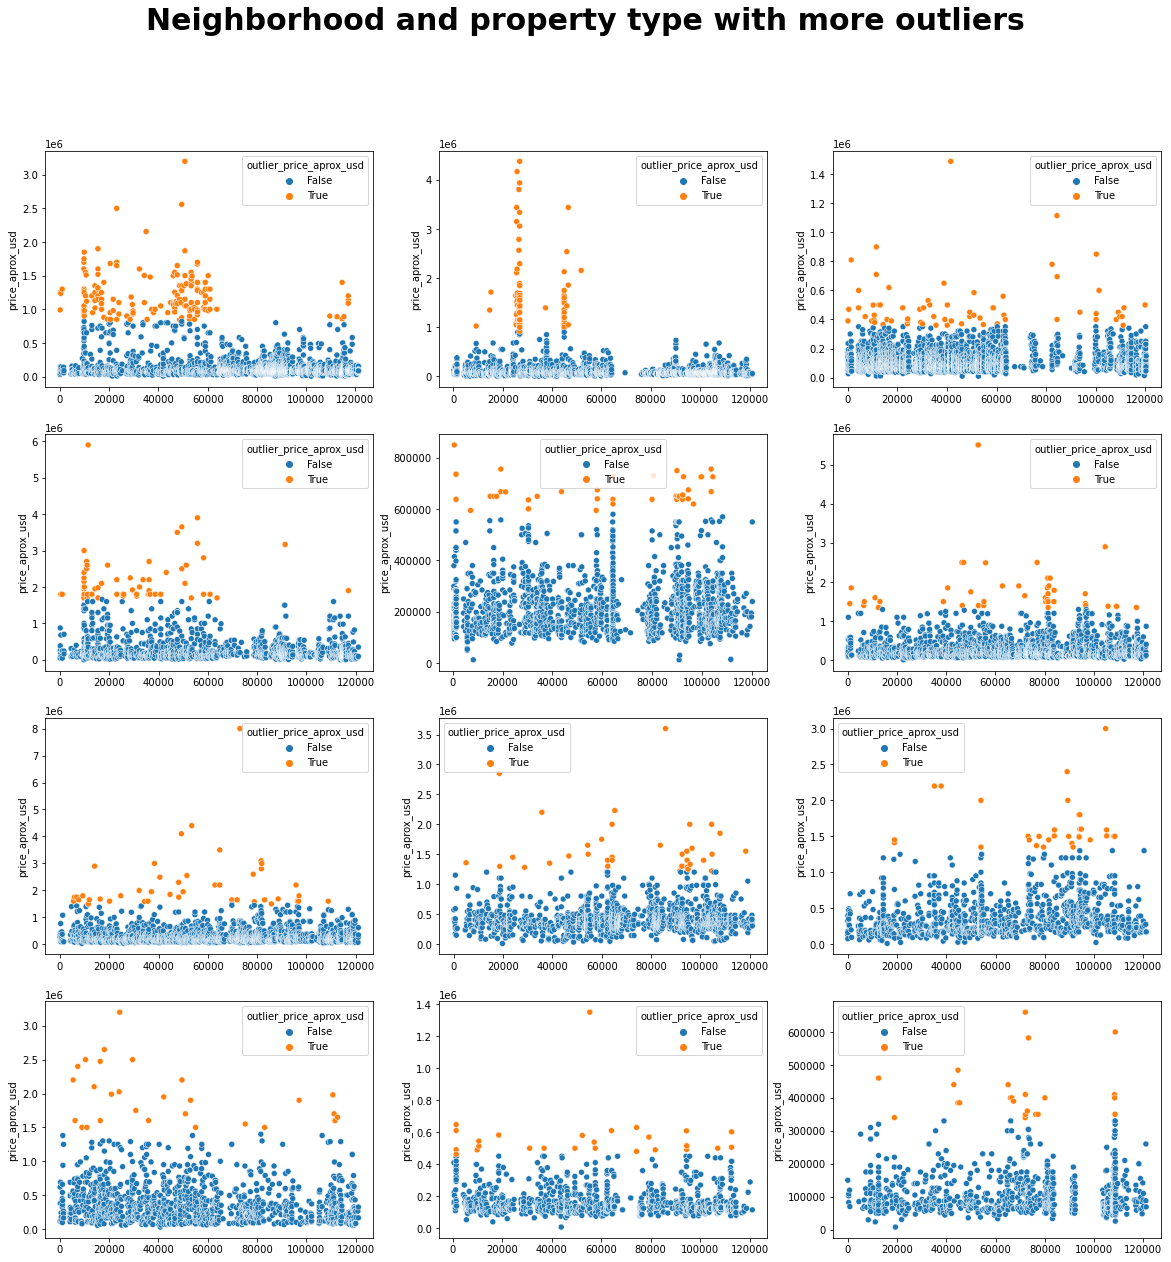

In [24]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
fig.suptitle('Neighborhood and property type with more outliers', size = 30, fontweight ="bold")

mask_pn_pt = (data['place_name'] == 'Córdoba') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[0,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Rosario') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[0,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Mar del Plata') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[0,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Córdoba') & (data['property_type'] == 'house')
sns.scatterplot(ax = axes[1,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Nordelta') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[1,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Belgrano') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[1,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Palermo') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[2,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Tigre') & (data['property_type'] == 'house')
sns.scatterplot(ax = axes[2,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Pilar') & (data['property_type'] == 'house')
sns.scatterplot(ax = axes[2,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Recoleta') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[3,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'Tigre') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[3,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

mask_pn_pt = (data['place_name'] == 'La Plata') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[3,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_aprox_usd', hue = data[mask_pn_pt].outlier_price_aprox_usd)

plt.show()

#### Detected outliers are removed from the dataset and the amount of total data in the dataset is verified.

In [25]:
data = data.loc[~mask_outliers_pau, :]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119396 entries, 0 to 121219
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   property_type               119396 non-null  object 
 1   place_name                  119396 non-null  object 
 2   place_with_parent_names     119396 non-null  object 
 3   state_name                  119396 non-null  object 
 4   geonames_id                 100935 non-null  float64
 5   lat                         68536 non-null   float64
 6   lon                         68536 non-null   float64
 7   price                       98986 non-null   float64
 8   currency                    98985 non-null   object 
 9   price_aprox_local_currency  98986 non-null   float64
 10  price_aprox_usd             98986 non-null   float64
 11  surface_total_in_m2         80304 non-null   float64
 12  surface_covered_in_m2       99697 non-null   float64
 13  price_usd_per_

#### The indices and number of outliers of the 'price_usd_per_m2' variable grouped by 'place_name' and 'property_type' are identified.

In [26]:
mask_outliers_stm2 = data.groupby(['place_name','property_type'])['surface_total_in_m2'].transform(lambda x: abs((x - x.mean())/x.std())>3)
data['outlier_surface_total_in_m2'] = mask_outliers_stm2
data.outlier_surface_total_in_m2.sum()

1058

#### The number of outliers of each data set grouped by 'place_name' and 'property_type' is identified.

In [27]:
data.groupby(['place_name','property_type']).outlier_surface_total_in_m2.sum().sort_values(ascending = False).head(12)

place_name     property_type
Palermo        apartment        32
Caballito      apartment        30
Flores         apartment        21
Villa Crespo   apartment        20
Nordelta       apartment        20
La Plata       apartment        18
Nuñez          apartment        17
Recoleta       apartment        17
San Telmo      apartment        17
Villa Urquiza  apartment        17
Barrio Norte   apartment        16
Boedo          apartment        15
Name: outlier_surface_total_in_m2, dtype: int64

#### Some scatter plots are made of the data sets with the highest number of outliers identified according to the variable 'surface_total_in_m2'.

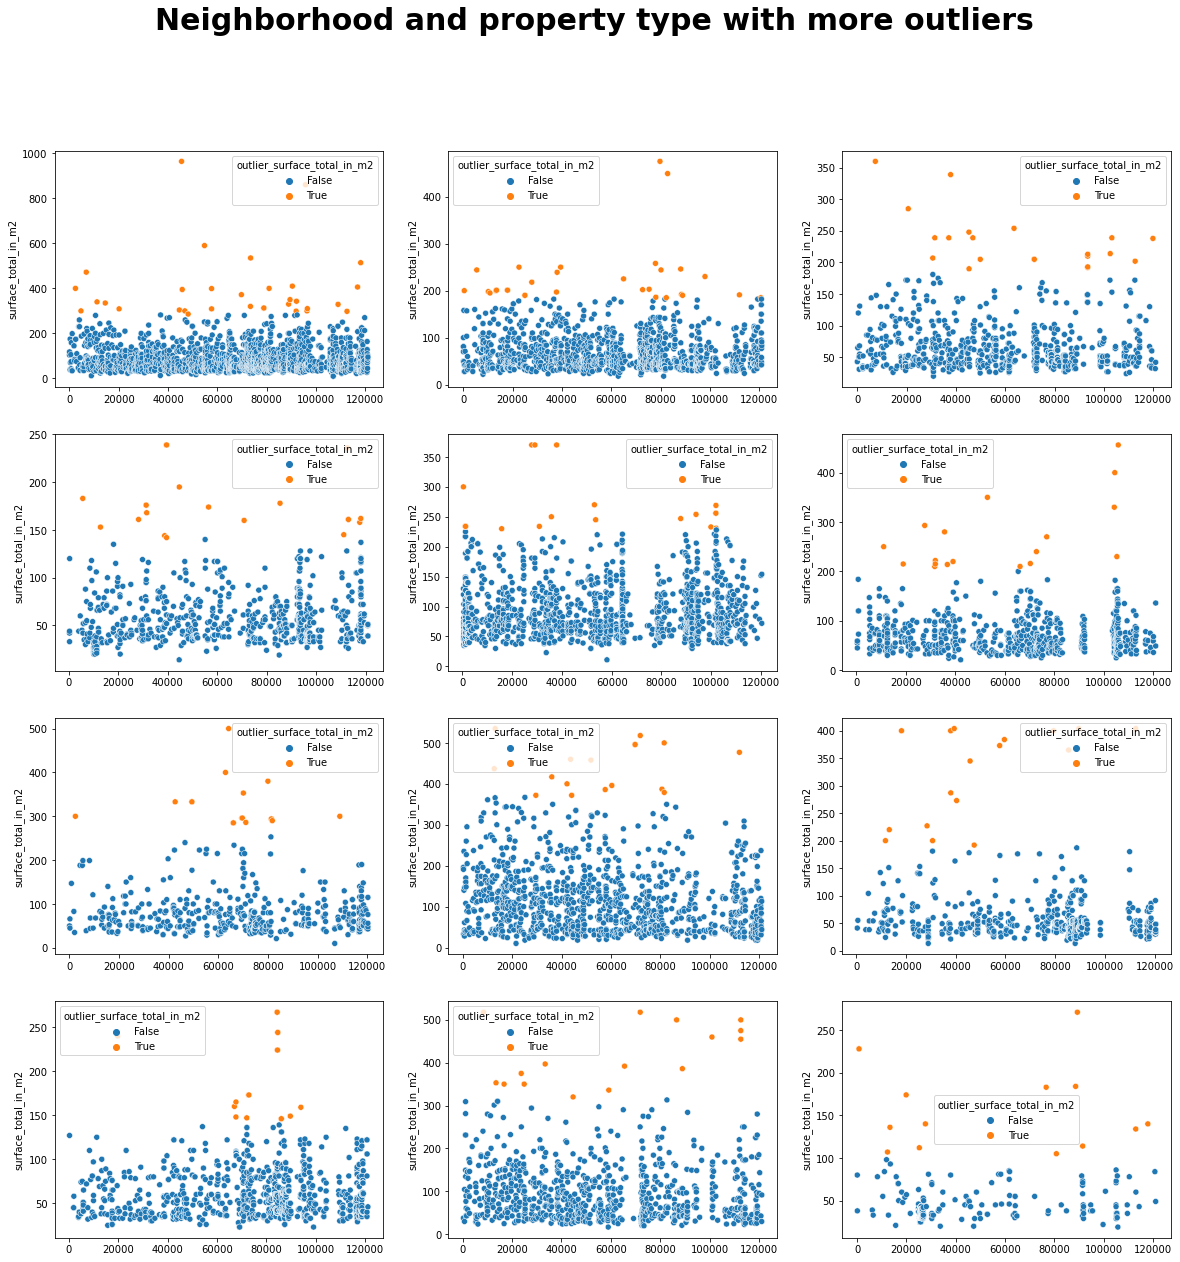

In [28]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
fig.suptitle('Neighborhood and property type with more outliers', size = 30, fontweight ="bold")

mask_pn_pt = (data['place_name'] == 'Palermo') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[0,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'Caballito') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[0,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'Flores') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[0,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'Villa Crespo') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[1,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'Nordelta') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[1,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'La Plata') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[1,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'Nuñez') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[2,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'Recoleta') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[2,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'San Telmo') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[2,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'Villa Urquiza') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[3,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'Barrio Norte') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[3,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

mask_pn_pt = (data['place_name'] == 'Boedo') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[3,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'surface_total_in_m2', hue = data[mask_pn_pt].outlier_surface_total_in_m2)

plt.show()

#### Detected outliers are removed from the dataset and the amount of total data in the dataset is verified.

In [29]:
data = data.loc[~mask_outliers_stm2, :]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118338 entries, 0 to 121219
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   property_type                118338 non-null  object 
 1   place_name                   118338 non-null  object 
 2   place_with_parent_names      118338 non-null  object 
 3   state_name                   118338 non-null  object 
 4   geonames_id                  100058 non-null  float64
 5   lat                          67864 non-null   float64
 6   lon                          67864 non-null   float64
 7   price                        98187 non-null   float64
 8   currency                     98186 non-null   object 
 9   price_aprox_local_currency   98187 non-null   float64
 10  price_aprox_usd              98187 non-null   float64
 11  surface_total_in_m2          79246 non-null   float64
 12  surface_covered_in_m2        98724 non-null   float64
 13 

#### The indices and number of outliers of the 'price_usd_per_m2' variable grouped by 'place_name' and 'property_type' are identified.

In [30]:
mask_outliers_pum2 = data.groupby(['place_name','property_type'])['price_usd_per_m2'].transform(lambda x: abs((x - x.mean())/x.std())>3)
data['outlier_price_usd_per_m2'] = mask_outliers_pum2
data.outlier_price_usd_per_m2.sum()

565

#### The number of outliers of each data set grouped by 'place_name' and 'property_type' is identified.

In [31]:
data.groupby(['place_name','property_type']).outlier_price_usd_per_m2.sum().sort_values(ascending = False).head(12)

place_name       property_type
Mar del Plata    apartment        27
Tigre            apartment        21
Belgrano         apartment        19
Villa Urquiza    apartment        15
Nordelta         house            15
Capital Federal  apartment        14
Barrio Norte     apartment        14
Nordelta         apartment        13
Córdoba          apartment        11
Pilar            apartment        11
                 house            11
Benavidez        house            11
Name: outlier_price_usd_per_m2, dtype: int64

#### Some scatter plots are made of the data sets with the highest number of outliers identified according to the variable 'price_usd_per_m2'.

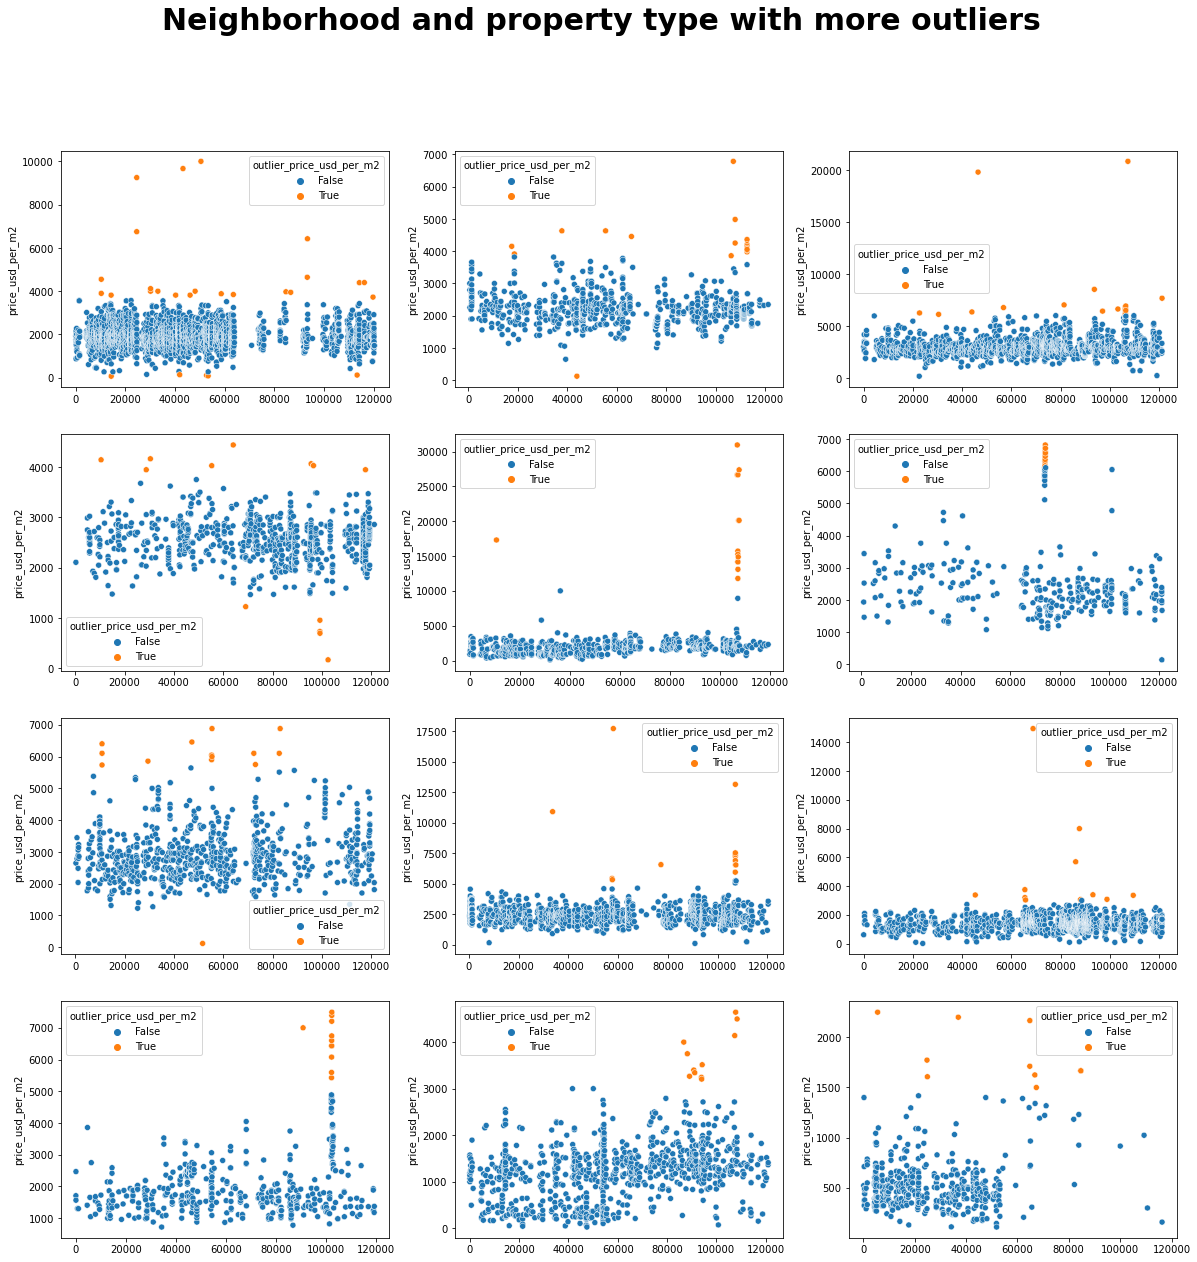

In [32]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
fig.suptitle('Neighborhood and property type with more outliers', size = 30, fontweight ="bold")

mask_pn_pt = (data['place_name'] == 'Mar del Plata') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[0,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Tigre') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[0,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Belgrano') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[0,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Villa Urquiza') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[1,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Nordelta') & (data['property_type'] == 'house')
sns.scatterplot(ax = axes[1,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Capital Federal') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[1,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Barrio Norte') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[2,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Nordelta') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[2,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Córdoba') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[2,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Pilar') & (data['property_type'] == 'apartment')
sns.scatterplot(ax = axes[3,0], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Pilar') & (data['property_type'] == 'house')
sns.scatterplot(ax = axes[3,1], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

mask_pn_pt = (data['place_name'] == 'Benavidez') & (data['property_type'] == 'house')
sns.scatterplot(ax = axes[3,2], data = data[mask_pn_pt], x = data[mask_pn_pt].index, y = 'price_usd_per_m2', hue = data[mask_pn_pt].outlier_price_usd_per_m2)

plt.show()

#### Detected outliers are removed from the dataset and the amount of total data in the dataset is verified.

In [33]:
data = data.loc[~mask_outliers_pum2, :]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117773 entries, 0 to 121219
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   property_type                117773 non-null  object 
 1   place_name                   117773 non-null  object 
 2   place_with_parent_names      117773 non-null  object 
 3   state_name                   117773 non-null  object 
 4   geonames_id                  99592 non-null   float64
 5   lat                          67579 non-null   float64
 6   lon                          67579 non-null   float64
 7   price                        97622 non-null   float64
 8   currency                     97621 non-null   object 
 9   price_aprox_local_currency   97622 non-null   float64
 10  price_aprox_usd              97622 non-null   float64
 11  surface_total_in_m2          78681 non-null   float64
 12  surface_covered_in_m2        98191 non-null   float64
 13 

## Missing data estimation of the variable 'price_aprox_usd'

#### Some data of the 'price_aprox_usd' variable is completed using the averages of this column grouped by "place_name" and "property_type" as a strategy.

In [34]:
data.price_aprox_usd = data.groupby(["place_name","property_type"])['price_aprox_usd'].apply(lambda x: x.fillna(x.mean()))
data.isna().sum().sort_values()

property_type                       0
outlier_price_aprox_usd             0
title                               0
outlier_surface_total_in_m2         0
outlier_price_usd_per_m2            0
place_name                          0
state_name                          0
place_with_parent_names             0
description                         2
price_aprox_usd                   471
geonames_id                     18181
surface_covered_in_m2           19582
price                           20151
price_aprox_local_currency      20151
currency                        20152
price_per_m2                    33008
surface_total_in_m2             39092
lat                             50194
lon                             50194
price_usd_per_m2                51725
rooms                           72009
expenses                       103962
floor                          110137
dtype: int64

## Missing data estimation of the variable 'price_usd_per_m2'

#### Some data of the 'price_usd_per_m2' variable is completed using the averages of this column grouped by "place_name" and "property_type" as a strategy.

In [35]:
data.price_usd_per_m2 = data.groupby(["place_name","property_type"])['price_usd_per_m2'].apply(lambda x: x.fillna(x.mean()))
data.isna().sum().sort_values()

property_type                       0
outlier_price_aprox_usd             0
title                               0
outlier_surface_total_in_m2         0
outlier_price_usd_per_m2            0
place_name                          0
state_name                          0
place_with_parent_names             0
description                         2
price_aprox_usd                   471
price_usd_per_m2                 2010
geonames_id                     18181
surface_covered_in_m2           19582
price                           20151
price_aprox_local_currency      20151
currency                        20152
price_per_m2                    33008
surface_total_in_m2             39092
lon                             50194
lat                             50194
rooms                           72009
expenses                       103962
floor                          110137
dtype: int64